In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import matplotlib.pyplot as plt


Deutsch’s Algorithm
-------------------------------------------------------
This implementation avoids custom instructions and uses only
native gates (X, H, CX, measure) to ensure full Aer compatibility.

In [2]:
# Function: deutsch_circuit(f_type)
def deutsch_circuit(f_type: str) -> QuantumCircuit:
    """
    Construct the full Deutsch circuit for the specified function type.

    Parameters
    ----------
    f_type : str
        One of the following:
            - "f0"     : constant function, f(x) = 0
            - "f1"     : constant function, f(x) = 1
            - "f_x"    : balanced, f(x) = x
            - "f_notx" : balanced, f(x) = 1 XOR x

    Returns
    -------
    QuantumCircuit
        A 2-qubit Deutsch circuit with 1 classical output bit.
    """

    # Create a quantum circuit with:
    # - 2 qubits  (input + output)
    # - 1 classical bit (to store measurement of qubit 0)
    qc = QuantumCircuit(2, 1)

    # Step 1: Initialize the second qubit to |1>
    qc.x(1)

    # Step 2: Put both qubits into superposition
    qc.h([0, 1])

    # Step 3: Apply the oracle inline (no custom gates)
    if f_type == "f0":
        # Constant 0: Do nothing
        pass

    elif f_type == "f1":
        # Constant 1: Flip output qubit
        qc.x(1)

    elif f_type == "f_x":
        # Balanced: f(x) = x → Controlled-NOT
        qc.cx(0, 1)

    elif f_type == "f_notx":
        # Balanced: f(x) = 1 XOR x
        qc.cx(0, 1)
        qc.x(1)

    else:
        raise ValueError("Valid options: f0, f1, f_x, f_notx")

    # Step 4: Apply Hadamard to first qubit to extract global parity info
    qc.h(0)

    # Step 5: Measure the first qubit (0 => constant, 1 => balanced)
    qc.measure(0, 0)

    return qc


=== Testing f0: Constant function f(x)=0 ===


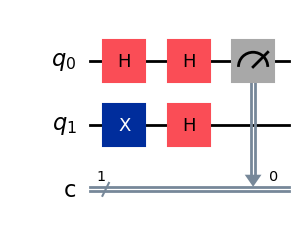

Algorithm Output: constant

=== Testing f1: Constant function f(x)=1 ===


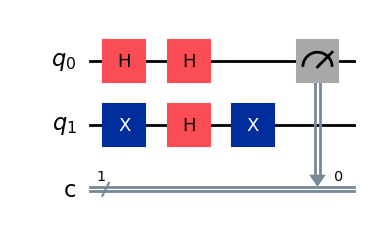

Algorithm Output: constant

=== Testing f_x: Balanced function f(x)=x ===


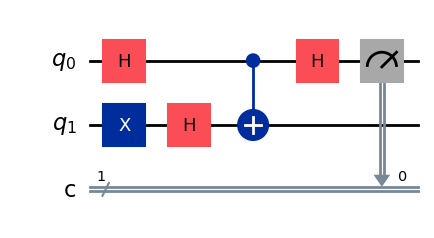

Algorithm Output: balanced

=== Testing f_notx: Balanced function f(x)=1⊕x ===


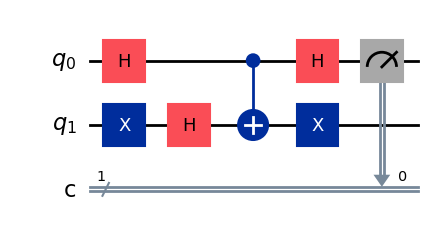

Algorithm Output: balanced


In [3]:






# ----------------------------------------------------------------------
# Function: run_deutsch_once(f_type)
# ----------------------------------------------------------------------
def run_deutsch_once(f_type: str) -> str:
    """
    Execute Deutsch's algorithm one time and classify the function.

    Parameters
    ----------
    f_type : str
        Oracle type as defined above.

    Returns
    -------
    str
        "constant" or "balanced"
    """
    qc = deutsch_circuit(f_type)
    backend = Aer.get_backend("aer_simulator")

    # Aer requires circuits to be compiled for the target backend
    from qiskit import transpile
    compiled_qc = transpile(qc, backend)

    # Execute with a single shot (Deutsch needs only one run)
    job = backend.run(compiled_qc, shots=1)
    result = job.result()
    counts = result.get_counts()

    # Extract the measured key (either "0" or "1")
    measured_bit = list(counts.keys())[0]

    return "constant" if measured_bit == "0" else "balanced"


# ----------------------------------------------------------------------
# Helper: show_circuit(f_type)
# ----------------------------------------------------------------------
def show_circuit(f_type: str):
    """Display the circuit diagram using Matplotlib."""
    circuit = deutsch_circuit(f_type)
    display(circuit.draw("mpl"))
    plt.show()


# ----------------------------------------------------------------------
# Test the algorithm on all four oracle types
# ----------------------------------------------------------------------
functions = {
    "f0": "Constant function f(x)=0",
    "f1": "Constant function f(x)=1",
    "f_x": "Balanced function f(x)=x",
    "f_notx": "Balanced function f(x)=1⊕x"
}

for func, desc in functions.items():
    print(f"\n=== Testing {func}: {desc} ===")
    show_circuit(func)
    print("Algorithm Output:", run_deutsch_once(func))
